$$\Huge{\text{DSC 521 Module 1 -Regression}}$$


# Regression and Scikit_learn

<font size=4>
Some basic regression and example from Chapter 1. First we load some packages from 

[Scikit-Learn](http://scikit-learn.org/stable/) [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
######################################### linear
reg=linear_model.LinearRegression()

%run packages.py
#%matplotlib inline

<font size=4>  Now let's plot a very simple **TOY data set**. What do we mean by Toy?  Not very complex and often one we create to do a visualization with that illustrates some concepts. 

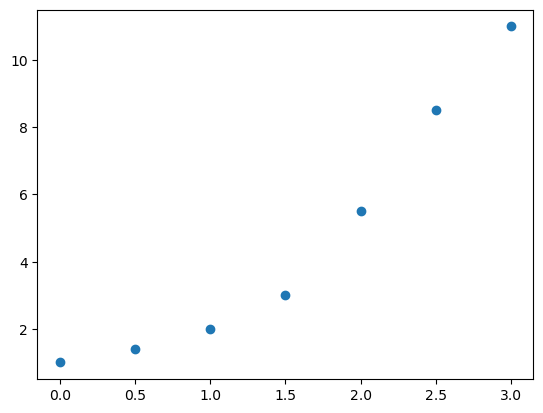

In [2]:
A=np.array([[0,1],[.5,1.4],[1,2],[1.5,3],[2,5.5],[2.5,8.5],[3,11]])
XA=A.T[0]
XA=XA.reshape(7,1)
y=A.T[1]
y=y.reshape(7,1)
plt.scatter(XA,y)

## Lines

<font size=4>  __Example__ Using Scikit_learn to perform regression. That is find a,b so that the line $$h(x)=a+bx$$ fits the data "the best".

-0.48214285714285765 3.407142857142857


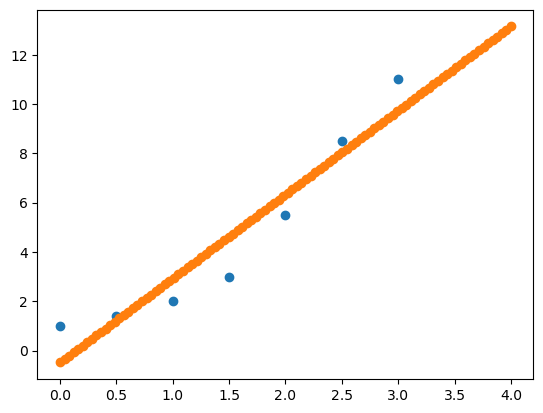

In [3]:
# Computing coefficents a,b with ScikitLearn 
reg.fit (XA,y)
a=reg.intercept_[0]
b=reg.coef_[0][0]
l0=np.linspace(0,4, 100)

 
plt.scatter(XA,y)
plt.scatter(l0,a+b*l0)
print(a,b)

In [4]:
l0

array([0.        , 0.04040404, 0.08080808, 0.12121212, 0.16161616,
       0.2020202 , 0.24242424, 0.28282828, 0.32323232, 0.36363636,
       0.4040404 , 0.44444444, 0.48484848, 0.52525253, 0.56565657,
       0.60606061, 0.64646465, 0.68686869, 0.72727273, 0.76767677,
       0.80808081, 0.84848485, 0.88888889, 0.92929293, 0.96969697,
       1.01010101, 1.05050505, 1.09090909, 1.13131313, 1.17171717,
       1.21212121, 1.25252525, 1.29292929, 1.33333333, 1.37373737,
       1.41414141, 1.45454545, 1.49494949, 1.53535354, 1.57575758,
       1.61616162, 1.65656566, 1.6969697 , 1.73737374, 1.77777778,
       1.81818182, 1.85858586, 1.8989899 , 1.93939394, 1.97979798,
       2.02020202, 2.06060606, 2.1010101 , 2.14141414, 2.18181818,
       2.22222222, 2.26262626, 2.3030303 , 2.34343434, 2.38383838,
       2.42424242, 2.46464646, 2.50505051, 2.54545455, 2.58585859,
       2.62626263, 2.66666667, 2.70707071, 2.74747475, 2.78787879,
       2.82828283, 2.86868687, 2.90909091, 2.94949495, 2.98989

<font size=4> Where do these coefficients come from? We can prove the minimum error can be found by computing the coefficients with geometry and linear algebra( there is also a calculus proof) $(X^TX)^{-1}X^Ty$.   Where
in this case our 
    
<br>
    
$$X^T=\begin{bmatrix} 1 &1 &1  &\dots &1\\ x_1 &x_2 &x_3 &\dots &x_m\end{bmatrix}$$  

<br>
$$y=\begin{bmatrix} y_1 &y_2 &y_3 &\dots &y_m\end{bmatrix}$$
    
is called the design matrix. We will do this a couple times today but we will see how we can "__learn__" to get the coefficients using Gradient Descent. t.  

In [5]:
from numpy import linalg as LA
X=np.array([[1,0],[1,.5],[1,1],[1,1.5],[1,2],[1,2.5],[1,3]])
XTX= np.dot(X.T,X)
Xy= np.dot(X.T,y) 
linco = np.dot(np.linalg.inv(XTX),Xy)
print(linco)

[[-0.48214286]
 [ 3.40714286]]


<font size =4 color=blue> From model predict value for x=2.2 and x=4

In [6]:
reg.predict([[2.2]]), reg.predict([[4]])

(array([[7.01357143]]), array([[13.14642857]]))

## Polynomials

<font size=4> What about  higher degree polynomials? We need Polynomial Features from sklearn. 
    
<font size=4>  __Example__ Using Scikit_learn to perform regression. That is find a1,b1 and c1 so that the quadratic <br>
    
$$g(x)=a1+b1x+c1x^2$$ 

<br>
fits the data "the best". Here we will use the predict function to graph the model.

a1= 1.035714285714283 b1= -0.2357142857142841 c1= 1.2142857142857142


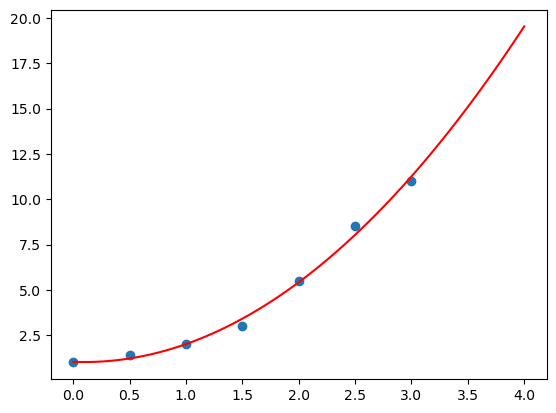

In [7]:
poly_f=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_f.fit_transform(XA)
reg.fit(X_poly,y)
a1=reg.intercept_[0]
b1=reg.coef_[0][0]
c1=reg.coef_[0][1]
plt.scatter(XA,y)

#differnet way to plot using prdeict function

#l1=l0
l1=l0.reshape(-1,1)

L1=poly_f.fit_transform(l1) 
plt.plot(l1,reg.predict(L1), "r")
#plt.plot(l0, a1 + b1*l0+c1*np.power(l0,2), "r")
print("a1=",a1,"b1=",b1,"c1=",c1)

In [8]:
l0.shape,l1.shape,L1.shape

((100,), (100, 1), (100, 2))

In [9]:
XA,X_poly

(array([[0. ],
        [0.5],
        [1. ],
        [1.5],
        [2. ],
        [2.5],
        [3. ]]),
 array([[0.  , 0.  ],
        [0.5 , 0.25],
        [1.  , 1.  ],
        [1.5 , 2.25],
        [2.  , 4.  ],
        [2.5 , 6.25],
        [3.  , 9.  ]]))

<font size =4 color=blue> From model predict value for x=2.2 and x=4

In [10]:
S1=poly_f.fit_transform([[2.2]])
S2=poly_f.fit_transform([[4]]) 
reg.predict(S1),reg.predict(S2)

(array([[6.39428571]]), array([[19.52142857]]))

<font size=4>We can again find our coefficients with linear algebra 
in this case the design matrix is 

<br>
    
$$X2^T=\begin{bmatrix} 1 &1 &1  &\dots &1\\ x_1 &x_2 &x_3 &\dots &x_m\\x_1^2 &x_2^2 &x_3^2 &\dots &x_m^2\end{bmatrix}. $$


<br>
    
<font color=blue> __Exercise:  Modify the code above to reproduce the coefficients using 
    the matrix calculation.__

In [11]:
X=np.array([[1,0,0],[1,.5,.5**2],[1,1,1],[1,1.5,1.5**2],[1,2,2**2],[1,2.5,2.5**2],[1,3,3**2]])
XTX= np.dot(X.T,X)
Xy= np.dot(X.T,y) 
linco = np.dot(np.linalg.inv(XTX),Xy)
print(linco)

[[ 1.03571429]
 [-0.23571429]
 [ 1.21428571]]


In [12]:
X


array([[1.  , 0.  , 0.  ],
       [1.  , 0.5 , 0.25],
       [1.  , 1.  , 1.  ],
       [1.  , 1.5 , 2.25],
       [1.  , 2.  , 4.  ],
       [1.  , 2.5 , 6.25],
       [1.  , 3.  , 9.  ]])

## Best Model part 1

<font size=4> The quadratic looks better but is there a way to quantify it? [$R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination)

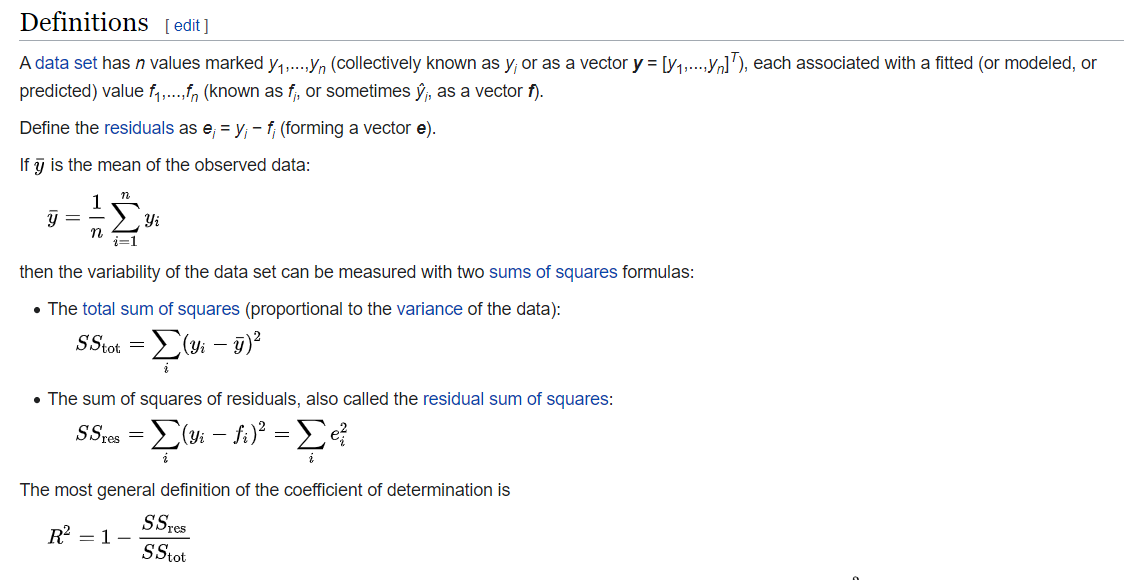

In [13]:
reg.fit (XA,y)
print("Line Fit",reg.score(XA,y))

poly_f=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_f.fit_transform(XA)
reg.fit(X_poly,y)
print("Quadratic fit",reg.score(X_poly,y))



Line Fit 0.9079949238578681
Quadratic fit 0.9944928646681352


<font size=4> It looks like the quadratic has the higher $R^2$ value but we need to be careful we can over fit data.  We'll talk about this in Module 2.

<font color=blue size=4 > __Exercise:  Modify the code above to fit a sixth degree polynomial. You do not have to list the coefficients.  Plot the results and calculate the $R^2$.__ 

6th degree 1.0


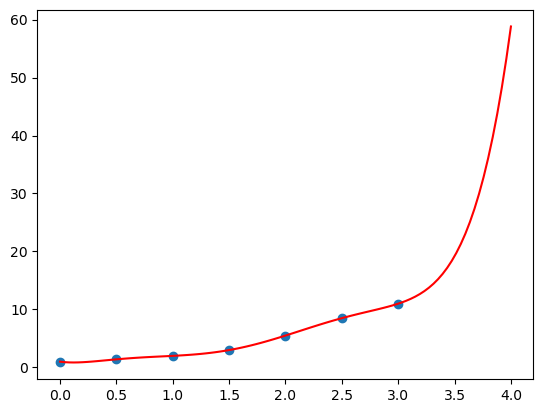

In [14]:
#
poly_f=PolynomialFeatures(degree=6,include_bias=False)
X_poly=poly_f.fit_transform(XA)
reg.fit(X_poly,y)
plt.scatter(XA,y)

#differnet way to plot using prdeict function
l0=np.linspace(0,4, 100)
l1=l0.reshape(-1,1)
L1=poly_f.fit_transform(l1) 
plt.plot(l1, reg.predict(L1), "r")
print("6th degree",reg.score(X_poly,y))

<font size =4 color=blue> From model predict value for x=2.2 and x=4

In [15]:
S1=poly_f.fit_transform([[2.2]])
S2=poly_f.fit_transform([[4]]) 
reg.predict(S1),reg.predict(S2)

(array([[6.74965248]]), array([[58.8]]))

<font size =4 color =blue> __Anything bother you about the plot, the $R^2$ or the predictions?__
    
<font color=brown>__Answer__ Looks like it grows to fast after 3.0.  Perfect fit R=1 is suspect.

# Newtons Method and Gradient descent

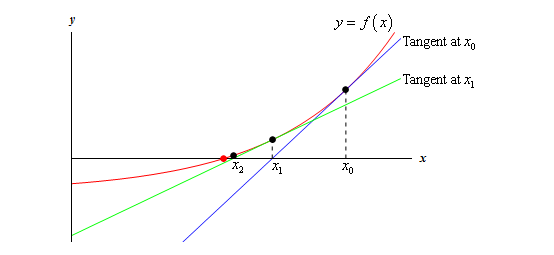

<font size=4>To find $x_z$ so that $f(x_z)=0$ a common approach is to use Newton's method.  Start with  guess $x_0$ and calculate tangent line  ,i.e., $y=f'(x_0)(x-x_0)+f(x_0)$. Now solve for $y=0$, that is solve for $x_1$ in $0=f'(x_0)(x_1-x_0)+f(x_0)$ and this gives you your next guess $x_1=x_0-\frac{f(x_0)}{f'(x_0)}$  Rinse and repeat. $x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}$ 
<br>
    
If we apply to find zeros of derivatives we have a form of gradient descent used to find minimums. For simplicity consider the special case of a parabola $f(x)= ax^2 +bx+c$,  $x_{n+1}=x_n-\frac{f'(x_n)}{f''(x_n)}$ but in this case $f''(x)=a$ so 
$x_{n+1}=x_n-\gamma{f'(x_n)}$  which in higher dimensions generalize as 

<br>
$${\displaystyle \mathbf {\Theta} _{n+1}=\mathbf {\Theta} _{n}-\gamma \nabla F(\mathbf {\Theta} _{n})}$$

__Gradient Descent Example__

[Wikipedia](https://en.wikipedia.org/wiki/Gradient_descent) gives us a one dimensional python example. The gradient descent algorithm is applied to find a local minimum of the function $f(x)=x^4−3x^3+2$, with derivative $f'(x)=4x^3−9x^2.$  We are going to simplify it a bit.

In [16]:
x0=3.3
x0-.005*(4*x0**3-9*x0**2)



3.07131

In [17]:
# From calculation, it is expected that the local minimum occurs at x=9/4

cur_x = 6# The algorithm starts at x=6 Change startin point to -1
gamma = .005 # step size multiplier
max_iter=200

df = lambda x: 4 * x**3 - 9 * x**2

for t in range(0, max_iter):
    cur_x += -gamma * df(cur_x)
    #print(cur_x)

print("The local minimum occurs at %f" % cur_x)

The local minimum occurs at 2.250000


<font size=4>From calculus critical points are found at $4x^3-9x^2=0$, or $0$ and $9/4$ 

2.25


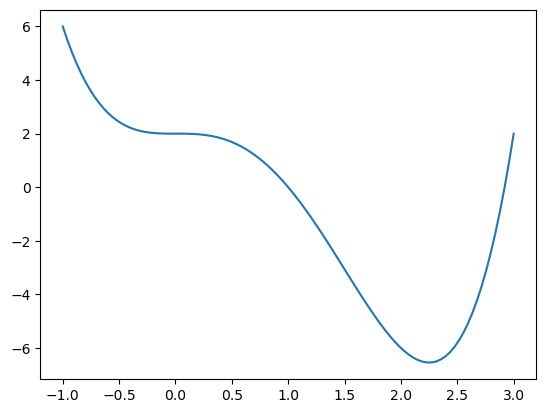

In [18]:
print(9/4)
f = lambda x:  x**4 - 3*x**3+2
f(9/4)
graph(f,-1,3,100)

<font color=blue size=4>__Exercise:  Change starting point to -1. That is change line 3 to Cur_x=-1  What are results?__

<font size=4 color=brown> __Answer:__

## Application of Gradient Descent  to Regression

<font size=4> Recall the simple regression we did this week using Scikit learn and the normal equations $(X^TX)^{-1}X^Ty$ to solve for the coefficients $\Theta=(a,b)$ for the model $h=a+b x$ 
    
Now let's find those same coefficients by learning, that is using gradient descent  

<br>
$${\displaystyle \mathbf {\theta} _{n+1}=\mathbf {\theta} _{n}-\gamma \nabla J(\mathbf {\theta} _{n})}$$  where 

$$\begin{align*}J(\theta)&=\frac{1}{m}\sum_{i=1}^m|h(x_i)-y_i|^2\\&=\frac{1}{m}\sum_{i=1}^m|a+b(x_i)-y_i|^2\end{align*}$$ is 
the __MSE error function__ Mean Sqaure Error.  

We will compute the gradient of $J$ later but for now I am just going to give it to you

 $$\begin{align*}\nabla J = \frac{1}{m}2X^T(X\theta-y)\end{align*}\\ $$
 
Where 
    
$$X^T=\begin{bmatrix} 1 &1 &1  &\dots &1\\ x_1 &x_2 &x_3 &\dots &x_m\end{bmatrix}$$ is the design matrix. 

Recall from above using Scikit learn and solving the normal equations we got
    
        a= -0.48214285714285765 b= 3.407142857142857
    
<font color=blue>Increase the max_iter parameter to 500 to get closer to what Scikit learn gave us.

In [19]:
A=np.array([[0,1],[.5,1.4],[1,2],[1.5,3],[2,5.5],[2.5,8.5],[3,11]])
y=A.T[1]
y=y.reshape(7,1)
X=np.array([[1,0],[1,.5],[1,1],[1,1.5],[1,2],[1,2.5],[1,3]])
np.random.seed(42)
C=np.random.random((2,1))# different initial guess can affect convergence
max_iter = 5000 #affects convergence increase to get closer
lam=.01 #affects convergence
for t in range(0, max_iter):
    out=X.dot(C)
    error=(out-y)
    grad_t=X.T.dot(error)
    C = C - lam*grad_t
    #print(C)
    
print(C)


[[-0.48214286]
 [ 3.40714286]]


# Correlation - What features should we use for predictions and classifications

<font size=4>
<br>     
    
Wiki page [Correlation](https://en.wikipedia.org/wiki/Correlation)

Letting $x_i$ and $y_i$ be features(variable) of a data set and $\overline x$ and $\overline y$ be the means(averages) of those variables  we can compute correlation by:

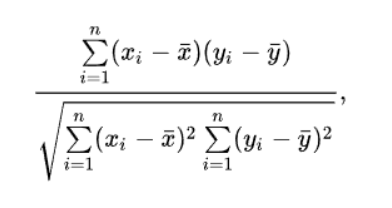

Let's compute a correlation from  Data sets stored in sklearn. https://scikit-learn.org/stable/datasets/toy_dataset.html

In [1]:
from sklearn.datasets import load_wine
data = load_wine()
import pandas as pd
wine=pd.DataFrame(data.data,columns =data.feature_names)
wine
wine.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [4]:
#data

In [5]:
#data

In [6]:
wine_class=pd.DataFrame(data.target,columns=["class"])
#print(wine_class)
wine_all=pd.concat([wine,wine_class],axis =1)
wine_all.corr()
wine_all.corr()['class']

alcohol                        -0.328222
malic_acid                      0.437776
ash                            -0.049643
alcalinity_of_ash               0.517859
magnesium                      -0.209179
total_phenols                  -0.719163
flavanoids                     -0.847498
nonflavanoid_phenols            0.489109
proanthocyanins                -0.499130
color_intensity                 0.265668
hue                            -0.617369
od280/od315_of_diluted_wines   -0.788230
proline                        -0.633717
class                           1.000000
Name: class, dtype: float64

<Axes: >

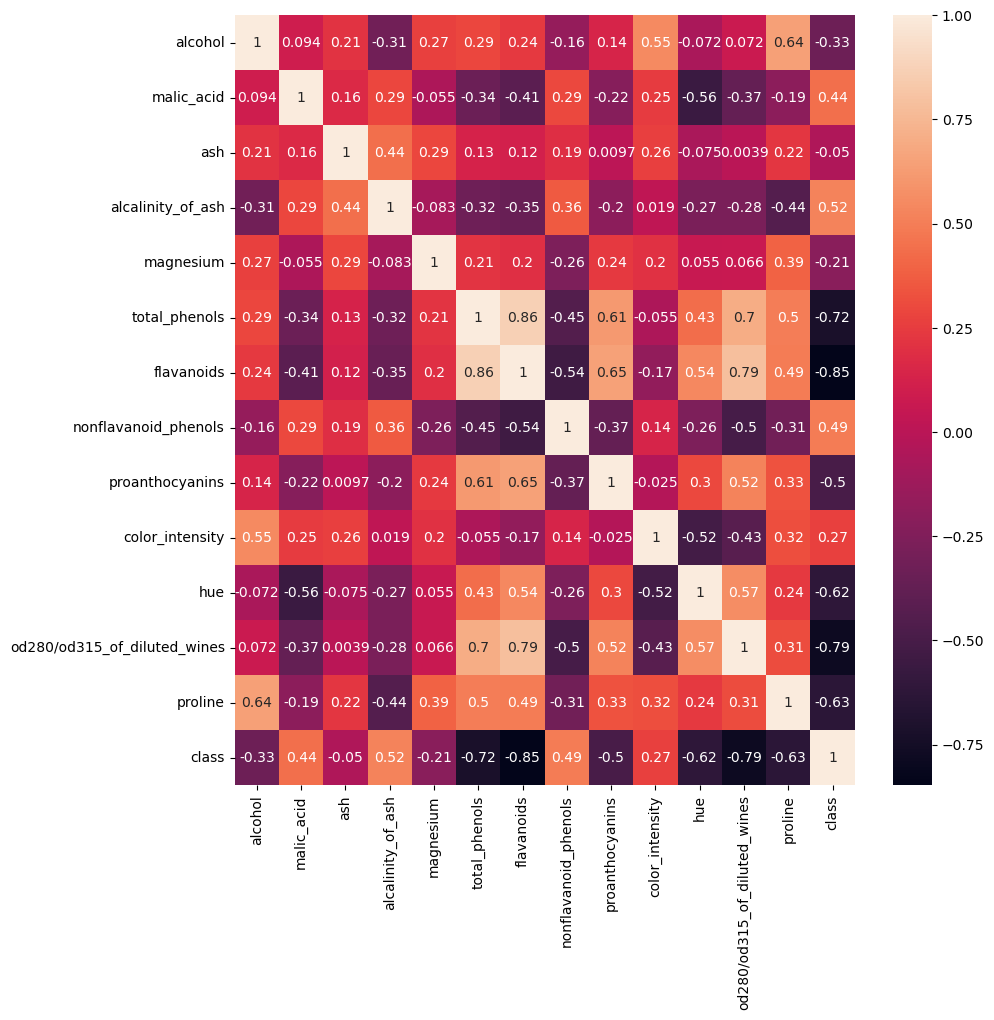

In [9]:
import seaborn as sb
corr = wine_all.corr()
#corr = np.abs(wine_all.corr())
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(corr,annot=True)

# <font color =blue >  Exercise
    
<font size=4 color =blue>  What feature is the most correlated (negatively or positively) with the class of wine ?  Do you think it would be good to do a linear regression here?   
    
<font color=brown>__answer:__    flavanoids 

# Chapter 1- Exerts from text


<font size=4>

Machine Learning is the field of study that gives computers the ability to learn without being
explicitly programmed. 

Arthur Samuel, 1959.


A computer program is said to learn from experience E with respect to some task T and some
performance measure P, if its performance on T, as measured by P, improves with experience E.

Tom Mitchell, 1997


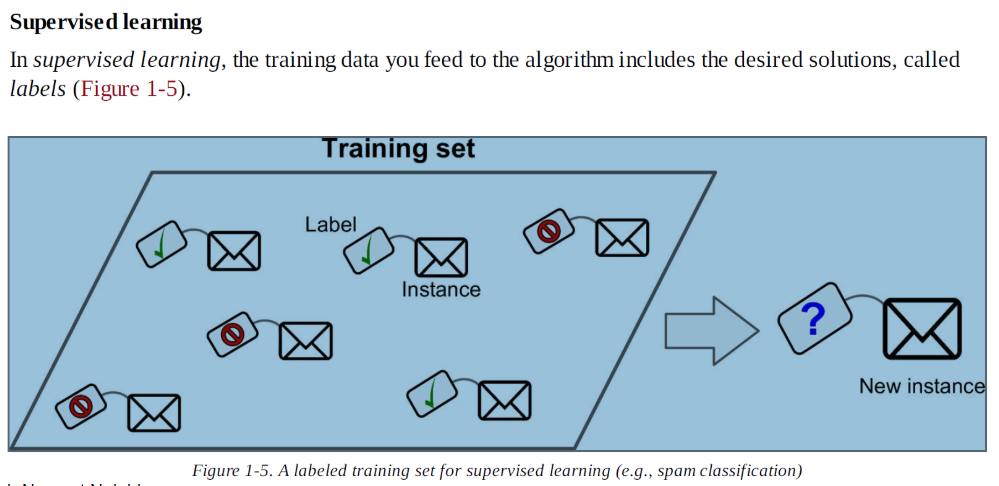


<font size=4>
k-Nearest Neighbors

Linear Regression

Logistic Regression

Support Vector Machines (SVMs) 

Decision Trees and Random Forests

Neural networks

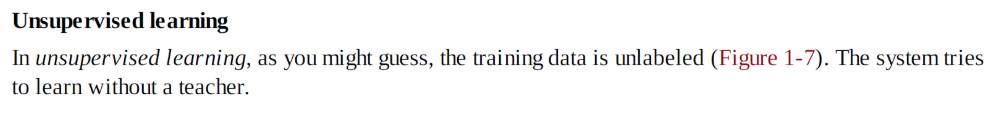

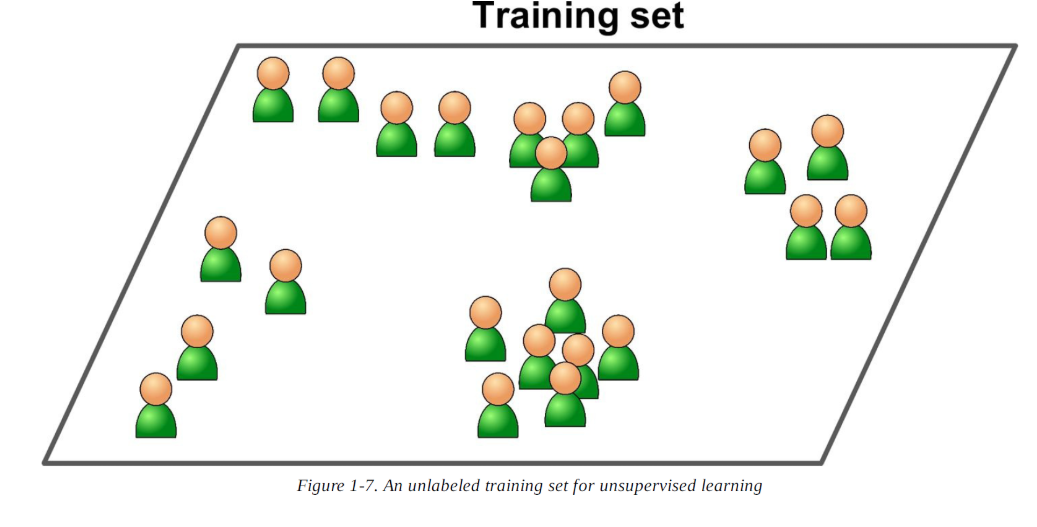

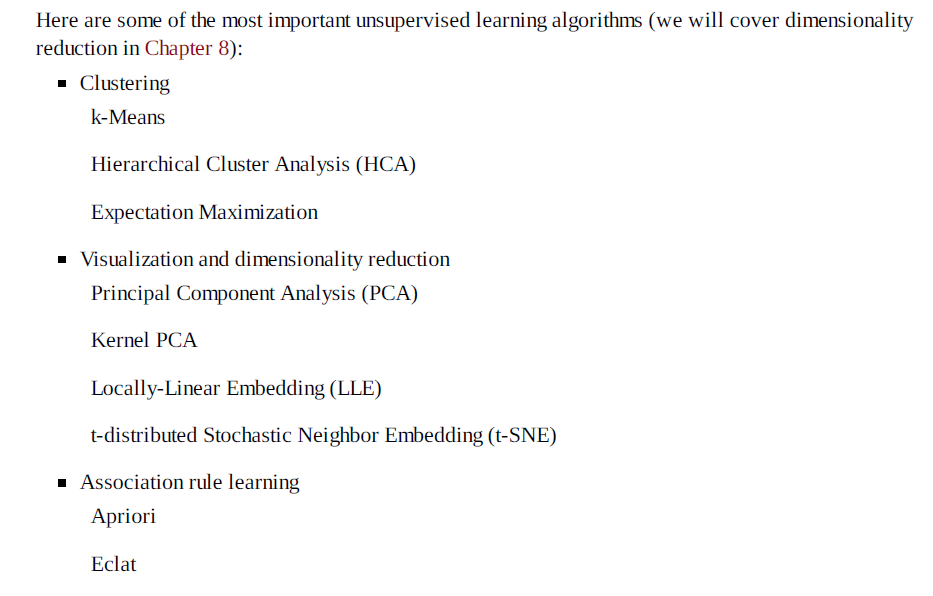

# Use simple matrix multiplication to create classifier

<font size=4> Let's consider the [Iris data set from scikit learn]https://scikit-learn.org/stable/datasets/toy_dataset.html)
    
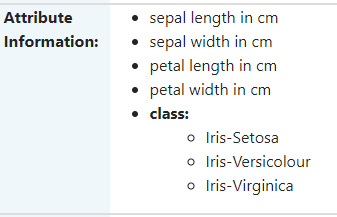

<font size=4> If we just plot the petal length and petal width of each flower and label it by class we get the image below.  
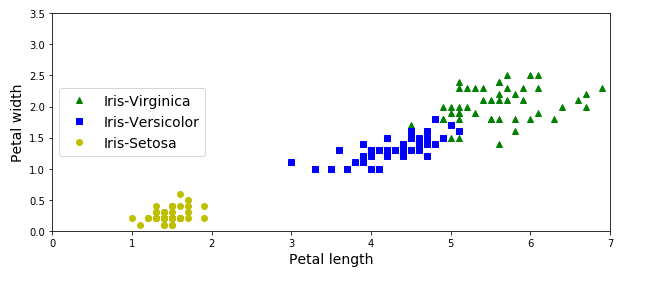    
We can use simple matrix multiplication to classify points in the plane. 

<font size=4> Let's start with an easy one. Suppose we want to find a matrix to classify 3 equal wedges!
    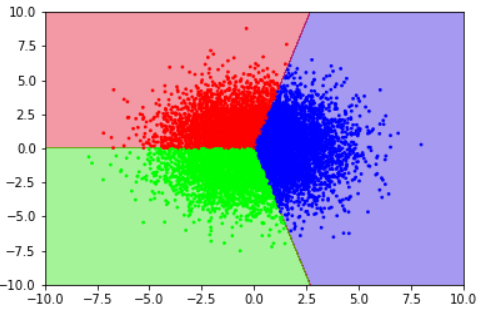

<font size=4> I actually know the matrix that will do this.  The order of the multiplication is a little foreign to mathematicians but suppose we have two measurements of a something we want to classify (like petal width and petal length) into three different classes.  We will put those measurements in a row vector $x=[m1,m2]$ Then we want to find a matrix $T$ that is $2 \times 3$ dimensional and compute the computation 

$$ xT$$

the result is a $1x3$ vector.  Which ever entry in that is largest we assign it to that class!

To get the graph above we Know T to be 

$$ T=\begin{bmatrix}1 & -\frac{\sqrt3}{2} &-\frac{\sqrt3}{2}\\0 & \frac{1}{2} &-\frac{1}{2}\end{bmatrix}$$

<font color=blue>__Exercise: What would our matrix classify the measurements [4,4]?__ 

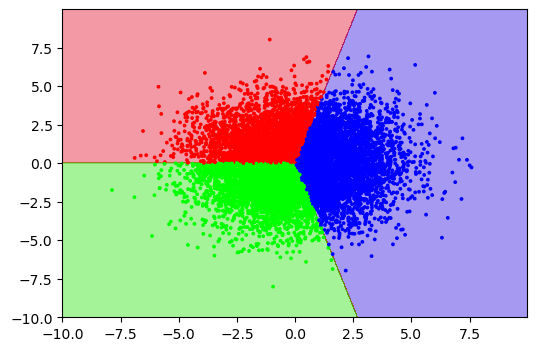

In [10]:
#""" Simple Soft max Calssifier """
plt.rcParams['figure.figsize'] = (6.0, 4.0) 
T = np.array([[1,-np.sqrt(3)/2,-np.sqrt(3)/2],[0, 1/2,-1/2]])# 
X = np.random.randn(10000,2)*2
scores = np.dot(X, T)
cl = np.argmax((scores), axis=1)
xx, yy = np.meshgrid(np.arange(-10, 10, .02),
                     np.arange(-10, 10, .02))
Z=np.dot((np.c_[xx.ravel(), yy.ravel()]),T)
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.brg, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=cl, s=3, cmap=plt.cm.brg)

<font size=4> Let 's use $T$  in Python to classify the points (1,0), (0,1), (-1,0), (0,-1),(4,4).   Apply the matrix then choose which class (column 0,1,2) is the largest 

In [26]:
T = np.array([[1,-np.sqrt(3)/2,-np.sqrt(3)/2],[0, 1/2,-1/2]])# MB frame 
X = np. array([[1, 0,-1,0,4],[0,1,0,-1,4]])
print("Points")
print(X)
print("scores")
scores = np.dot(X.T, T)
print(scores)
print("class")
cl = np.argmax((scores), axis=1)
print(cl)

Points
[[ 1  0 -1  0  4]
 [ 0  1  0 -1  4]]
scores
[[ 1.         -0.8660254  -0.8660254 ]
 [ 0.          0.5        -0.5       ]
 [-1.          0.8660254   0.8660254 ]
 [ 0.         -0.5         0.5       ]
 [ 4.         -1.46410162 -5.46410162]]
class
[0 1 1 2 0]


<font size=4 color =blue> __Exercise: what class is each of the point in and what colors correspond to what classes?__  

<font size=4 color=brown> __Answer:__ 0-blue 1-red 2-green

<font size=4> We can tweak this so we don't just get wedges with straight lines as boundaries.

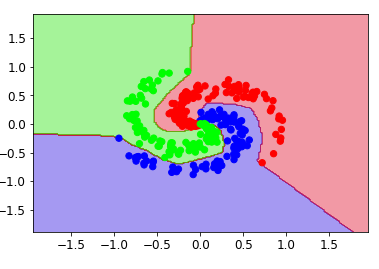

<font size=4 color =red>  $$\Huge{\text{How do we find this matrix?}}$$
    
<font size=4 color=blue> **Guesses?**

# Regression example page 21 of text.

<font size=4> Now let's look at the example from the text relating Life satisfaction and  GDP per capita.  You need to make sure the datasets folder from the text is in the same folder as this note book. Some data wrangling commands used [pivot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html). [merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html).

In [11]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn


oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',') # read in data 
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"] #Change Label Name
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")#rearange data

gdp_per_capita = pd.read_csv("gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True) #Change Label Name
gdp_per_capita.set_index("Country", inplace=True)

#merge data sets
country_stats=pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True) 

country_stats.sort_values(by="GDP per capita", inplace=True)

In [12]:
#Training set

remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
missing_data =country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

<font size=4>Let's convert from data frame to arrays to do the regression.

In [13]:
X=np.c_[sample_data['GDP per capita']]
y=np.c_[sample_data['Life satisfaction']]

model=sklearn.linear_model.LinearRegression()
model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


<font size=4> Finally Graph the results along with the prediction for Cyprus.

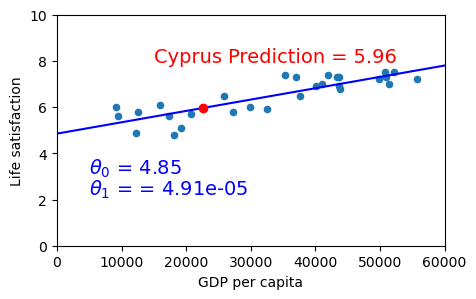

In [14]:
new=22587
a=model.predict([[new]])
b1=model.coef_[0][0]
b0=model.intercept_[0]
l0=np.linspace(0, 90000, 1000)

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
plt.plot(l0, b0 + b1*l0, "b")
plt.text(5000, 3.1, r"$\theta_0$ = {0} ".format(round(b0,2)), fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1$ = = {0} ".format('%.2e'% b1), fontsize=14, color="b")

plt.plot(new, a, "ro")
plt.text(15000, a+2, r"Cyprus Prediction = {0} ".format(round(a[0,0],2)), fontsize=14, color="r")
plt.show()


In [19]:
new=8670
model.predict([[new]])

array([[5.27888372]])

# Appendix: Derivation of MSE Gradient.  

We will review this in Module 2




<font size=4>__Partial Derivatives and Gradient__ Let $F(x,y)=(x-3y-2)^2+(x-4y-5)^2$.  Let's use the chain rule and treating the other variable like a constant to compute these partial derivatives.   

$\frac{\partial F}{\partial x}=2(x-3y-2)+2(x-4y-5)$

<br>

$\frac{\partial F}{\partial y}=2(x-3y-2)(-3)+2(x-4y-5)(-4)$

$\nabla F(x,y)=\begin{bmatrix}{\frac{\partial F}{\partial x}}\\{\frac{\partial F}{\partial y}}\end{bmatrix}=\begin{bmatrix} 2(x-3y-2)+2(x-4y-5)\\2(x-3y-2)(-3)+2(x-4y-5)(-4)\end{bmatrix} $ 

$\nabla F(1,2)=???$

<font size=4>
    
__Regression Basics__


We found  the $\theta$s fo the model $h_\theta(x)=\theta_0+\theta_1 x$ in three different ways in Module 1.  
 * We let Scikit-Learn  produce them    
 * We solved the normal equation
 $(X^TX){\Theta}=X^T{\bf y}$  which in most cases has a solution of  ${\Theta}= (X^TX)^{-1}X^T{\bf y}$.
 
 * We used Gradient Descent to have the __"Machine Learn"__ what the $\theta$ were.  Let's dive in a little deeper.

In this case our design matrix was $$X^T=\begin{bmatrix} 1 &1 &1  &\dots &1\\ x_1 &x_2 &x_3 &\dots &x_m\end{bmatrix}$$

Mathematically, we are finding $\theta_0$ and $\theta_1$ so that given the set of points $\{ (x_i,y_i)\}_{i=1}^m$ the function $h_\theta(x)=\theta_0+\theta_1 x$ minimizes the __Mean Square Error (MSE)__, i.e. if we let $\Theta =\begin{bmatrix} \theta_0\\ \theta_1\end{bmatrix}$  $$J(\Theta)=\frac{1}{m} \sum_{i=1}^m |h_\theta(x_i)-y_i|^2 \text { or in $\ell_2$ norm and matrix notation } \frac{1}{m}\|X\Theta-{\bf y}\|_2^2 $$ 

__Derivation of The Gradient for $J(\Theta)$__

Let's do a simple case where we only have three points to motivate the derivation.   

$$J(\Theta)=\frac{1}{3} \left( (\theta_0  +\theta_1 x_1-y_1)^2 + (\theta_0  +\theta_1 x_2-y_2)^2+ (\theta_0  +\theta_1 x_3-y_3)^2\right)$$

What is the gradient? The first row of the vector is the derivative of $J$ with respect to $\theta_0$ and the second is the derivative of $J$ with respect to $\theta_1$.

$$\begin{align*}\nabla J &=\begin{bmatrix}{\frac{\partial J}{\partial \theta_0}}\\{\frac{\partial J}{\partial \theta_1}}\end{bmatrix} \\ &= \frac{1}{3} \begin{bmatrix}2(\theta_0  +\theta_1 x_1-y_1)+2(\theta_0  +\theta_1 x_2-y_2)+2(\theta_0  +\theta_1 x_3-y_3) \\ 2x_1(\theta_0  +\theta_1 x_1-y_1)
+2x_2(\theta_0  +\theta_1 x_2-y_2)
+2x_3(\theta_0  +\theta_1 x_3-y_3) \end{bmatrix}\\
 &=\frac{2}{3}  \begin{bmatrix} 1& 1 &1\\x_1&x_2&x_3 \end{bmatrix} \begin{bmatrix}\theta_0  +\theta_1 x_1-y_1\\ \theta_0  +\theta_1 x_2-y_2\\ \theta_0  +\theta_1 x_3-y_3\end{bmatrix}\\
 &=\frac{2}{3} X^T(X\Theta-{\bf y})\end{align*}$$
 
 If we have $m$ points the Gradient generalizes to 
    
 
 $$\begin{align*}\nabla J &=  \begin{bmatrix}2\sum_{j=1}^m(\theta_0+\theta_1x_j-y_j)\\2\sum_{j=1}^m x_j(\theta_0+\theta_1x_j-y_j)\end{bmatrix}\\ &=\frac{2}{m}X^T(X\Theta-{\bf y})\end{align*}\\ $$
 
When we implement this in code we usually drop the  $\frac{2}{m}$ and incorporate it into the $\lambda$ so our gradient decent in this __MSE__  becomes

$$ \Theta_{n+1}=\Theta_{n}-\gamma X^T(X\Theta_n-{\bf y})$$